In [445]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [446]:
train_data = pd.read_csv('/content/Train1.csv')

In [447]:
train_data.head()

,id,Hobby,Category,Age,Occupation
0,1,Cricket,Sports,12,Student
1,2,Badminton,Sports,12,Student
2,3,Drawing,Art & Crafts,12,Student
3,4,Writing,Writing,14,Student
4,5,Badminton,Sports,14,Student


In [448]:
train_data.drop("id", inplace=True, axis=1)

In [449]:
train_data['Category'] = train_data['Category'].replace({'Sports':1, 'Art & Crafts':2, 'Writing':3, 'Reading':4, 'Educational':5, 'Outdoors':6, 'Games':7, 'Collecting':8, 'Entertainment':9, 'Others':10, 'Music':11, 'Food & Drink':12, 'High Tech':13, 'Intellectual':14, 'Gaming':15, 'Dancing':16})

In [450]:
train_data['Category'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., nan, 15., 16.])

In [451]:
train_data['Occupation'] = train_data['Occupation'].replace({'Student':1, 'Job':2,'ENGINEER':3,'IT engineer':3,'Senior Data Engineer': 3,'working':2,'Professor':4,'Housewife':5,'Private Job':2,'Library assistant':4})

In [452]:
train_data['Occupation'].unique()

array([1, 2, 3, 4, 5])

In [453]:
train_data['Hobby'] = train_data['Hobby'].replace({'Arcade games':1, 'Badminton':2, 'Bike riding':3, 'Binge watching ':4, 'Chess':5, 'Classical dance':6, 'Classical music':7, 'Coding':8, 'Cooking':9, 'Creating youtube videos':10, 'Cricket':11, 'Cycling':12, 'Dance':13, 'Drawing':14, 'Driving cars':15, 'Exploring business ideas':16, 'Exploring Tech':17, 'Farming':18, 'Fishing':19, 'Gaming':20, 'Gardening':21, 'Having fun with friends':22, 'Learning new things':23, 'Listening music':24,'Long drives':25, 'Making web pages':26, 'Movies':27, 'Nature place walking':28, 'Outdoor sports':29, 'PC Gaming':30, 'Playing':31, 'Playing basketball':32, 'Playing chess':33, 'Programming':34, 'Puzzels':35, 'Reading':36, 'Research':37, 'Shopping':38, 'Singing':39, 'Skiing':40, 'Solo Travelling':41, 'Spiritual Inclined activities':42, 'Sport Equipment':43,'Sport equipment':43, 'Swimming':44, 'Trading':45, 'Travelling':46, 'Trecking':47, 'Watching anime':48, 'Watching cricket':49, 'Watching youtube videos':50,'Writing':51, 'Yoga':52})

In [454]:
train_data['Hobby'].unique()

array([11.,  2., 14., 51., 44., 36., 37., 46., 28., 20., 24., 17., nan,
       34., 30., 27.,  1.,  8., 13., 26.,  5., 32., 31.,  4.,  3.,  7.,
       29.,  9., 12., 47., 45., 33., 42., 38., 40., 18., 19., 43., 41.,
        6., 21., 16., 15., 39., 52., 23., 50., 22., 35., 25., 48., 10.])

In [455]:
train_data.dropna(inplace=True)

In [456]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hobby       386 non-null    float64
 1   Category    386 non-null    float64
 2   Age         386 non-null    int64  
 3   Occupation  386 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.1 KB


In [457]:
X_train, X_test, y_train, y_test = train_test_split(train_data[['Hobby','Age','Occupation']], train_data['Category'], test_size=0.05, random_state=0)

In [458]:
X_train

,Hobby,Age,Occupation
81,43.0,19,1
62,46.0,24,2
159,8.0,19,1
56,20.0,21,1
281,43.0,19,1
...,...,...,...
335,9.0,20,1
199,12.0,20,1
120,36.0,19,1
49,47.0,21,1


In [459]:
y_train

81      1.0
62      6.0
159    13.0
56      7.0
281     1.0
       ... 
335    12.0
199     1.0
120     4.0
49      6.0
178    11.0
Name: Category, Length: 366, dtype: float64

In [460]:
from sklearn import linear_model
mymodel = linear_model.LogisticRegression(max_iter=10000)
mymodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [461]:
mymodel.predict(X_test)

array([ 6.,  1.,  4.,  1.,  1.,  1.,  1.,  1.,  1.,  4.,  1.,  1.,  1.,
       12.,  6.,  1.,  6.,  1.,  6.,  2.])

In [462]:
y_test

270     6.0
332     1.0
149     4.0
54     11.0
218     5.0
311     1.0
320     4.0
147     1.0
327     6.0
68      4.0
271     1.0
39      1.0
71      1.0
103    12.0
248     4.0
334     1.0
93     10.0
313     7.0
233     4.0
316     2.0
Name: Category, dtype: float64

In [463]:
mymodel.score(X_test, y_test)

0.6

In [464]:
predicted_output = mymodel.predict(X_test)

In [465]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_output)
cm

array([[7, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 2, 0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1]])

Text(24.0, 0.5, 'Truth or Actual Value')

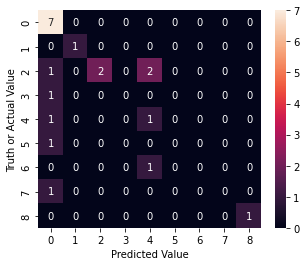

In [466]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')